# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group 5
* Team member names:
    - Gaetan 
    - Albara
    - Mohannad
    - Mohib

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [3]:
pentathlon_nptb['message'].unique()

['team', 'backcountry', 'endurance', 'water', 'racquet', 'strength', 'control']
Categories (7, object): ['backcountry', 'control', 'endurance', 'racquet', 'strength', 'team', 'water']

In [4]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [5]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")


```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```


In [6]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%        -4.34      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%        -0.06      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%         0.10      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%        -0.04      0.032   -1.121   0.262     
message[strength]   1.063    6.3%         0.06      0.032    1.945   0.052    .
message[team]       1.024    2.4%         0.02      0.032    0.755    0.45     
message[water]      1.037    3.7%         0.04      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%         0.88      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [7]:
# importing functions from a module/package
from utils import functions

functions.example()



You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [8]:
## Question answers


# Exploratory Analysis

First, we want to analyze the data and see if there is any missing values or see how our data behave

In [9]:
pentathlon_nptb.describe()

,total_os,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,1.377075,48210.991667,28.876553,0.923168,0.913310,1.563755,0.110302,0.987448,0.521488,0.929232,0.700000
std,13.049660,17469.764342,14.854906,0.465974,1.427295,2.212532,0.421757,1.592435,0.755581,1.215840,0.458258
min,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35000.000000,18.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45000.000000,27.000000,0.900000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,55000.000000,38.000000,1.100000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,863.000000,200000.000000,100.000000,5.800000,16.000000,23.000000,8.000000,16.000000,6.000000,11.000000,1.000000


In [10]:
pentathlon_nptb.isnull().sum()

custid              0
buyer               0
total_os            0
message             0
age                 0
female              0
income              0
education           0
children            0
freq_endurance      0
freq_strength       0
freq_water          0
freq_team           0
freq_backcountry    0
freq_racquet        0
training            0
dtype: int64

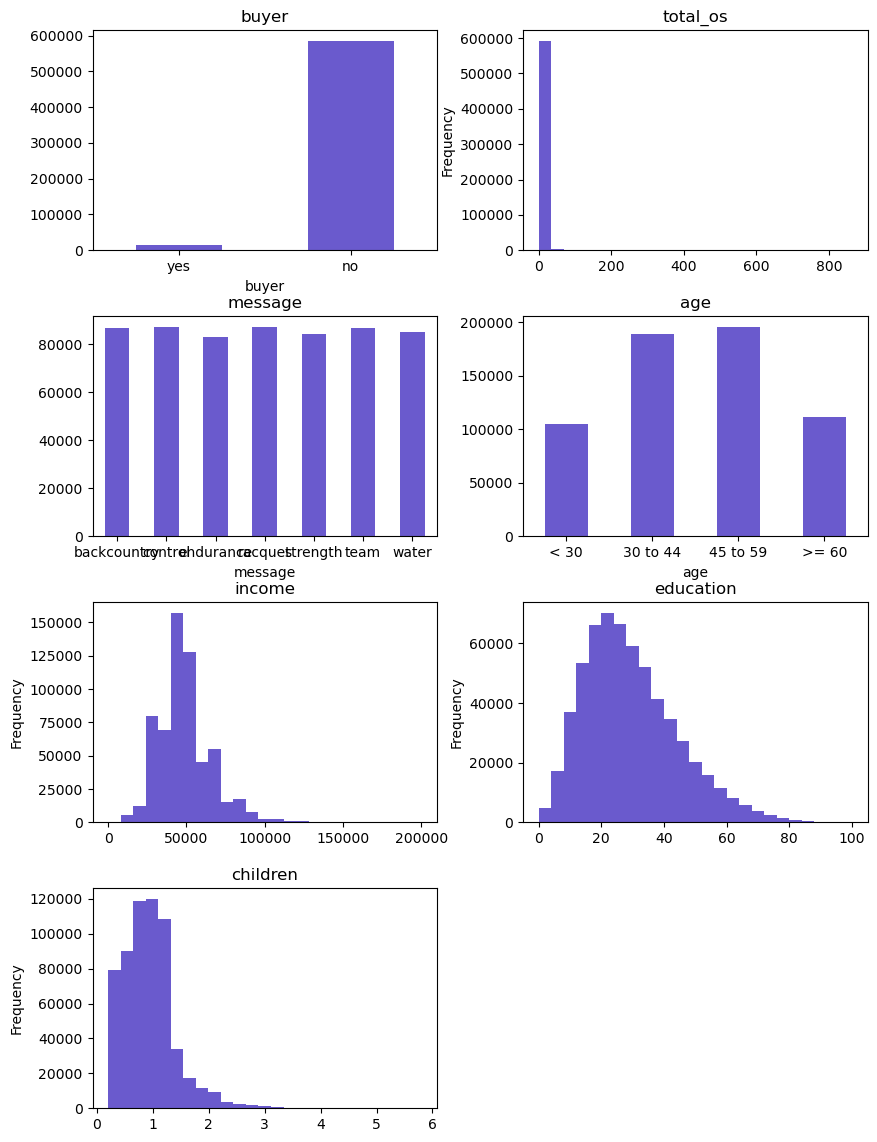

In [11]:
rsm.distr_plot(pentathlon_nptb[['buyer', 'total_os', 'message', 'age', 'income', 'education', 'children']])

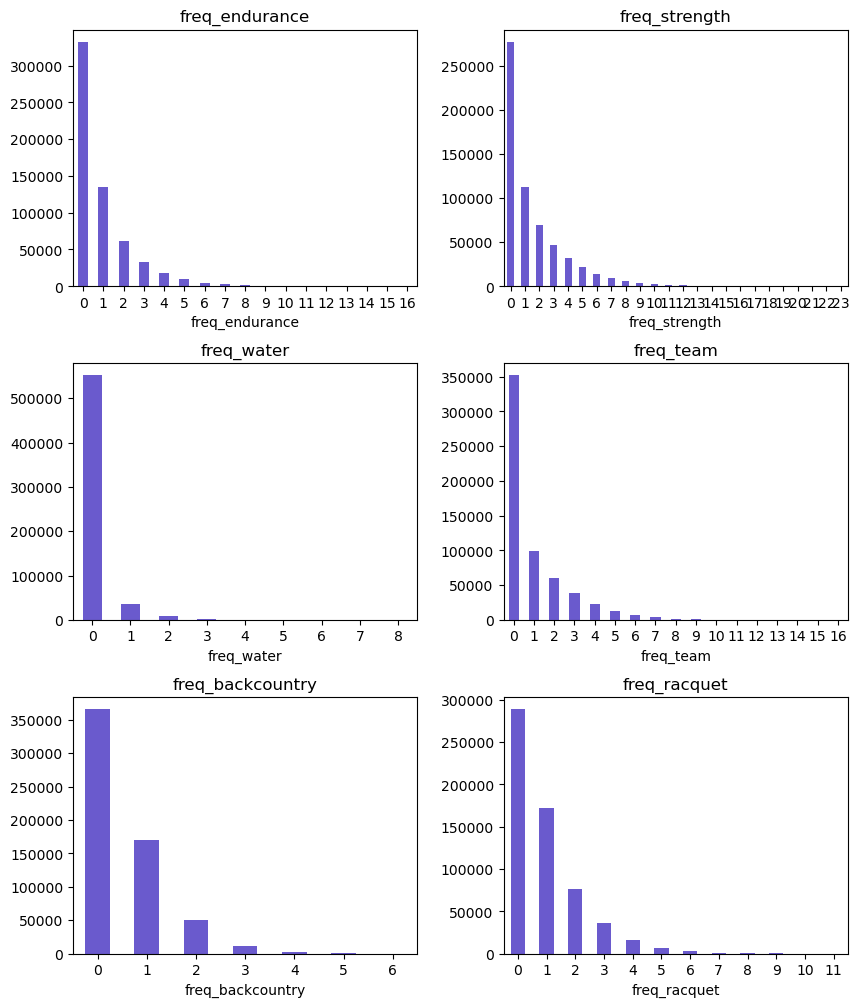

In [12]:
rsm.distr_plot(pentathlon_nptb[['freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']])

As we can see, water does not seem to be a big share of their business. The other department might attract more shares. This is an interesting insight to understand a bit more the business of this company, and who are the clients. Most of the clients are between 30 and 60 years. 

# 1.  Perform the analysis following the instruction e-mailed by Anna to the analytics team (Step 1 to 8 above). Use logistic regression, neural networks, random forests, and XGBoost. Each ML model must be tuned using at least two hyper parameters.

## Logistic Model

In [13]:
# First, let's create a column buyer_yes, if the customer has purchased or not
pentathlon_nptb['buyer_yes'] = rsm.ifelse(pentathlon_nptb.buyer == "yes", 1, 0)

In [14]:
evar=['message','female', 'age', 'income', 'education', 'children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [15]:
ivar=[f'{e}:message' for e in evar if e != 'message']
ivar

['female:message',
 'age:message',
 'income:message',
 'education:message',
 'children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [16]:
lr = rsm.logistic({'penthalon': pentathlon_nptb[pentathlon_nptb['training']==1]}, rvar='buyer_yes', lev=1, evar=evar, ivar=ivar)
lr.summary()

Logistic regression (GLM)
Data                 : penthalon
Response variable    : buyer_yes
Level                : 1
Explanatory variables: message, female, age, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer_yes
Alt. hyp.: There is an effect of x on buyer_yes

                                        OR      OR%  coefficient  std.error  z.value p.value     
Intercept                            0.000  -100.0%        -8.25      0.153  -53.948  < .001  ***
message[control]                     1.115    11.5%         0.11      0.220    0.496    0.62     
message[endurance]                   1.199    19.9%         0.18      0.213    0.850   0.395     
message[racquet]                     1.084     8.4%         0.08      0.217    0.370   0.711     
message[strength]                    0.959    -4.1%        -0.04      0.216   -0.195   0.846     
message[team]                        0.

In [17]:
pentathlon_nptb['p_endurance'] = lr.predict(pentathlon_nptb.assign(message="endurance"))['prediction']
pentathlon_nptb['p_backcountry'] = lr.predict(pentathlon_nptb.assign(message="backcountry"))['prediction']
pentathlon_nptb['p_racquet'] = lr.predict(pentathlon_nptb.assign(message="racquet"))['prediction']
pentathlon_nptb['p_water'] = lr.predict(pentathlon_nptb.assign(message="water"))['prediction']
pentathlon_nptb['p_team'] = lr.predict(pentathlon_nptb.assign(message="team"))['prediction']
pentathlon_nptb['p_strength'] = lr.predict(pentathlon_nptb.assign(message="strength"))['prediction']
pentathlon_nptb['p_nomessage'] = lr.predict(pentathlon_nptb.assign(message="control"))['prediction']

### 1. For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.  


To determine the message that lead the highest probability of purchase, we proceed in a 2-steps process:

1) We first train a model, using a logistic regression based on the data we received. The data have been prepared in a randomized way, as each client were selected for a message randomly. In this model, we use all the features available. 
As each client have received either one of the 6 messages or no-message at all, we have included interactions with all features, using messages as an interaction for each feature
2) Using the model, we then predict the probability of purchase. However, in order to have the probability for each one of the message (or no message) for each customer, we have to predict the probability 7 times, by assigning each time one of the message type. As such, we will be able to get the probability of purchase subject to a specific message. Once we get all the probability, we have to look at the highest one to determine what message is linked to this highest probability. 

In [18]:
pentathlon_nptb["to_message"] = (
    pentathlon_nptb[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]]
    .idxmax(axis=1)
    .str.replace("p_endurance", "endurance")
    .replace("p_strength","strength")
    .replace("p_backcountry","backcountry")
    .replace("p_racquet","racquet")
    .replace("p_strength", "strength")
    .replace("p_team","team")
    .replace("p_nomessage", "control")
    .replace("p_water", "water")
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,buyer_yes,p_endurance,p_backcountry,p_racquet,p_water,p_team,p_strength,p_nomessage,to_message
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0,0.015682,0.011131,0.014499,0.012604,0.012008,0.015452,0.012022,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0,0.006014,0.005556,0.005858,0.004981,0.005279,0.005475,0.004605,endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0,0.013884,0.010718,0.008789,0.009680,0.009533,0.009343,0.009140,endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0,0.002970,0.002339,0.002089,0.002389,0.002264,0.002196,0.002252,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0,0.019675,0.011526,0.012039,0.011437,0.011119,0.011463,0.010784,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0,0.003217,0.001947,0.002118,0.002042,0.001946,0.002089,0.001966,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0,0.007731,0.007884,0.008257,0.005832,0.007692,0.008117,0.006959,racquet
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0,0.011345,0.010062,0.008976,0.008286,0.008225,0.009822,0.008535,endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0,0.006971,0.007164,0.007352,0.005272,0.006796,0.007284,0.006378,racquet


### 2. For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages

In [19]:
messages = pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training==0].to_message, columns="count")
# Calculate the total count
total_count = messages['count'].sum()

# Calculate the percentage for each category
messages['percentage'] = (messages['count'] / total_count) * 100
messages.sort_values(by=['percentage'], ascending=False)

col_0,count,percentage
to_message,,
endurance,125861,69.922778
strength,36584,20.324444
racquet,12299,6.832778
water,2129,1.182778
team,1680,0.933333
backcountry,1447,0.803889


As we can see from our distribution table, a message for the endurance department target most of the customer base from the test set, as endurance message maximize the probability of purchase for 69.92% of them. Strength is another key message as it maximize the probability of purchase for 20.32% of them.
Only 1% of the customer base from the test set should receive a message regarding water. Arguably, we can think that this department might be influence by the season, and will surely have a low market-share for at least half of the year.

Furthermore, it seems like sending no message has not showed efficiency as no message does not maximize the probability of purchases for the whole test set. Hence, we can think that sending no message is not efficient in terms of marketing perspective.

### 3. For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit. 

First of all, we do not have the margin for each department. Therefore, we need to predict the order size (measured in Euros) as we do have these data from our experiment dataset. We will train a linear regression and try to predict what would be the size of the order for each message.
Once we get the purchase size subject to each one of the message, we multiply each one of the predictions to its corresponding purchase size. This will predict the expected profit for each client based on its :
1) His individual probability of purchase 
2) His individual predicted size of purchase

In [20]:
evar_regress=['female', 'age', 'income', 'education', 'children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [21]:
only_buyers = pentathlon_nptb[(pentathlon_nptb['buyer']=="yes") & (pentathlon_nptb['training']==1)]

In [22]:
linear = rsm.model.regress({'penthalon':only_buyers}, rvar='total_os', evar=evar, ivar=ivar)
linear.summary()

Linear regression (OLS)
Data                 : penthalon
Response variable    : total_os
Explanatory variables: message, female, age, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on total_os is zero
Alt. hyp.: the effect of x on total_os is not zero

                                     coefficient  std.error  t.value p.value     
Intercept                                 -9.616      8.976   -1.071   0.284     
message[control]                          17.412     12.953    1.344   0.179     
message[endurance]                         9.106     12.058    0.755    0.45     
message[racquet]                           4.179     12.822    0.326   0.745     
message[strength]                          1.414     12.601    0.112   0.911     
message[team]                             10.566     12.573    0.840   0.401     
message[water]                             6.659     12.905    0.516   0.606   

The result from our this model is not very conclusive. Although the p-value of the model is significant (< 0.001), the R-Squared is extremely low for a linear regression. It suggests that the explanatory variable cannot really explain the effect on the quantity purchases (in terms of Euros). Also, most of the variables have high p-value.

We have thought about another approach. We tried to get the mean of orders for each message. Although we can get an estimation of the quantity purchases subject to each message, with a final profit that would make sense, we decided to reject this approach for the whole project. In fact, we believe that each user will spend differently based on their variable such as income or age. As such, we think that a prediction using a linear regression is a good estimate for this case.

In this linear regression, we have to include the interactions in the same way and rationale we used in our logistic regression in the first step. 

In [23]:
### Predict test
pentathlon_nptb['r_endurance'] = linear.predict(pentathlon_nptb.assign(message="endurance"))['prediction']
pentathlon_nptb['r_backcountry'] = linear.predict(pentathlon_nptb.assign(message="backcountry"))['prediction']
pentathlon_nptb['r_racquet'] = linear.predict(pentathlon_nptb.assign(message="racquet"))['prediction']
pentathlon_nptb['r_water'] = linear.predict(pentathlon_nptb.assign(message="water"))['prediction']
pentathlon_nptb['r_team'] = linear.predict(pentathlon_nptb.assign(message="team"))['prediction']
pentathlon_nptb['r_strength'] = linear.predict(pentathlon_nptb.assign(message="strength"))['prediction']
pentathlon_nptb['r_nomessage'] = linear.predict(pentathlon_nptb.assign(message="control"))['prediction']


In [24]:
pentathlon_nptb["ep_endurance"] = pentathlon_nptb.p_endurance * (pentathlon_nptb.r_endurance*0.4)
pentathlon_nptb["ep_backcountry"] = pentathlon_nptb.p_backcountry * (pentathlon_nptb.r_backcountry*0.4)
pentathlon_nptb["ep_racquet"] = pentathlon_nptb.p_racquet * (pentathlon_nptb.r_racquet*0.4)
pentathlon_nptb["ep_water"] = pentathlon_nptb.p_water * (pentathlon_nptb.r_water*0.4)
pentathlon_nptb["ep_strength"] = pentathlon_nptb.p_strength * (pentathlon_nptb.r_strength*0.4)
pentathlon_nptb["ep_control"] = pentathlon_nptb.p_nomessage * (pentathlon_nptb.r_nomessage*0.4)
pentathlon_nptb["ep_team"] = pentathlon_nptb.p_team * (pentathlon_nptb.r_team*0.4)

In [25]:
pentathlon_nptb["to_message_ep"] = (
    pentathlon_nptb[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]]
    .idxmax(axis=1)
    .str.replace("ep_endurance", "endurance")
    .replace("ep_strength","strength")
    .replace("ep_backcountry","backcountry")
    .replace("ep_racquet","racquet")
    .replace("ep_strength", "strength")
    .replace("ep_team","team")
    .replace("ep_control", "control")
    .replace("ep_water", "water")
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,r_strength,r_nomessage,ep_endurance,ep_backcountry,ep_racquet,ep_water,ep_strength,ep_control,ep_team,to_message_ep
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,21.730353,25.236825,0.216080,0.134664,0.195891,0.156698,0.134311,0.121358,0.156712,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,28.028061,37.814291,0.062177,0.082633,0.076926,0.070799,0.061379,0.069649,0.076910,backcountry
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,45.913194,44.056584,0.226274,0.212843,0.160029,0.178231,0.171589,0.161065,0.190095,endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,23.304665,27.738903,0.017330,0.024032,0.015177,0.015070,0.020472,0.024983,0.027964,team
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,47.637263,50.730429,0.438275,0.215235,0.235699,0.292381,0.218423,0.218840,0.230874,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,29.232564,38.540879,0.045158,0.022554,0.023164,0.031609,0.024427,0.030303,0.028061,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,30.776396,39.284554,0.104605,0.124557,0.133698,0.109818,0.099924,0.109358,0.091593,racquet
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,34.081998,34.064075,0.183446,0.137761,0.142633,0.151322,0.133897,0.116298,0.107603,endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,30.465412,34.333637,0.086541,0.106018,0.105891,0.091192,0.088766,0.087589,0.068280,backcountry


### 4.Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [26]:
messages_ep = pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training==0].to_message_ep, columns="count")

# Calculate the total count
total_count = messages_ep['count'].sum()

# Calculate the percentage for each category
messages_ep['percentage'] = (messages_ep['count'] / total_count) * 100
messages_ep

col_0,count,percentage
to_message_ep,,
backcountry,30106,16.725556
control,3358,1.865556
endurance,73494,40.830000
racquet,23757,13.198333
strength,8357,4.642778
team,28361,15.756111
water,12567,6.981667


This distribution is quite interesting. When looking at the expected profit, we do not have the same target predictions compared to the first question. In fact, the proportion of clients receiving endurance has decreased by about 20%. The messages targeting backcountry has increased by about 14%.

Interestingly, we can detect that some customers should not receive any messages at all. They are maybe part of the "Do not disturb" segment.

### 5. What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the  message to each customer? Include no-message as an option as well.

In [27]:
pentathlon_nptb["ep_max"] = pentathlon_nptb[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]].max(axis=1)

In [28]:
expected_profit_target = pentathlon_nptb[pentathlon_nptb['training']==0]['ep_max'].mean().round(3)
print(f'The expected profit, on average, per customer with a targeting appraoch is {expected_profit_target}€')

The expected profit, on average, per customer with a targeting appraoch is 0.704€


### 6. What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option. 

In [29]:
import numpy as np

In [30]:
expected_profit_per_message = (pentathlon_nptb.loc[pentathlon_nptb.training==0, ["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control", "ep_max"]]
 .agg(np.mean).round(3)
 .sort_values(ascending=False)
 .reset_index())

expected_profit_per_message

/tmp/ipykernel_72955/1791513826.py:2: FutureWarning: The provided callable <function mean at 0x7f826c6af060> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).round(3)


,index,0
0,ep_max,0.704
1,ep_endurance,0.627
2,ep_water,0.603
3,ep_strength,0.603
4,ep_backcountry,0.594
5,ep_team,0.540
6,ep_racquet,0.523
7,ep_control,0.430


Sending a customized message to each customer yields the highest average profit per customer. Interestingly, sending an endurance message, a water message or a strength message to the whole customer base yields about 20 cents more than sending no message at all. The three messages would yields almost the same average profit per customer, including backcountry.
Sending each client a team or racquet message would decrease the average profit. It is quite interesting to see that although sending a water message should have been sent to only 6% of the customers, sending this message to all of them still outperforms most of the other type of messages.

### 7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition? 

As all the clients received a message randomly, we decided to assign the same message to each one them to follow this "randomized trial".

In [31]:

pentathlon_nptb['e_random'] = pentathlon_nptb.apply(lambda row: row[f'ep_{row["message"]}'], axis=1)

In [129]:
profit_random = pentathlon_nptb['e_random'].mean()

print(f'The expected profit if we assign a message randomly would {profit_random}')

The expected profit if we assign a message randomly would 0.5523631226092197


### 8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)

In [130]:
profit_customized = expected_profit_per_message.iloc[0, 1] * 5000000
profit_average= expected_profit_per_message.iloc[1:6, 1].mean() * 5000000
profit_no_message = expected_profit_per_message.iloc[7, 1] * 5000000
profit_random = profit_random * 5000000

In [125]:
print(f'The improvement in Euro for a customized approach compared to all no message is {profit_customized-profit_no_message} or {profit_customized/profit_no_message*100}%')

The improvement in Euro for a customized approach compared to all the same message is 1370000.0 or 163.72093023255815%


In [126]:
print(f'The improvement in Euro for a customized approach compared to all the same message is {profit_customized-profit_average} or {profit_customized/profit_average*100}%')

The improvement in Euro for a customized approach compared to all the same message is 553000.0 or 118.63835524098417%


In [131]:
print(f'The improvement in Euro for a customized approach compared to a randomized approach is {profit_customized-profit_random} or {profit_customized/profit_random*100}%')

The improvement in Euro for a customized approach compared to all the same message is 758184.3869539015 or 127.4523897747712%


In [133]:
# make a table with the improvements in euro and percentage
improvement_logit = pd.DataFrame({
    'improvement': [profit_customized-profit_no_message, profit_customized-profit_average, profit_customized-profit_random],
    'percentage': [profit_customized/profit_no_message*100, profit_customized/profit_average*100, profit_customized/profit_random*100]
}, index=['no_message', 'same_message', 'random'])

improvement_logit

,improvement,percentage
no_message,1.370000e+06,163.720930
same_message,5.530000e+05,118.638355
random,7.581844e+05,127.452390


## Neural Network Model

In [37]:
pentathlon_nptb_nn = pd.read_parquet('data/pentathlon_nptb.parquet')

In [38]:
pentathlon_nptb_nn['buyer_yes'] = np.where(pentathlon_nptb_nn['buyer']=='yes', 1, np.where(pentathlon_nptb_nn['buyer'] == "no", 0, np.nan))

In [39]:
NN = rsm.mlp(
    {'pentathlon_nptb': pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1]},
    rvar='buyer_yes',
    lev=1,
    evar=evar,
    hidden_layer_sizes=(1,),
    mod_type="classification"  
)
NN.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer_yes
Level                : 1
Explanatory variables: message, female, age, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.884

Raw data             :
  message female      age  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team     no 30 to 44   55000         19       0.8               0              4           0          4                 0             1
endurance    yes 45 to 59   45000         33       

In [40]:
"""from sklearn import metrics
from sklearn.model_selection import GridSearchCV

hls = [
        (1,), (2,), (3,), (4,), (5,),
        (2,1), (2,2), (2,3), (2,4), (2,5),
        (3,1), (3,2), (3,3), (3,4), (3,5),
       ]

learning_rate = ['constant', 'invscaling', 'adaptive']

param_grid = {'hidden_layer_sizes': hls,
              'learning_rate': learning_rate}

scoring = {'AUC': 'roc_auc'}

nn_cv = GridSearchCV(
    NN.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=5
)"""

"from sklearn import metrics\nfrom sklearn.model_selection import GridSearchCV\n\nhls = [\n        (1,), (2,), (3,), (4,), (5,),\n        (2,1), (2,2), (2,3), (2,4), (2,5),\n        (3,1), (3,2), (3,3), (3,4), (3,5),\n       ]\n\nlearning_rate = ['constant', 'invscaling', 'adaptive']\n\nparam_grid = {'hidden_layer_sizes': hls,\n              'learning_rate': learning_rate}\n\nscoring = {'AUC': 'roc_auc'}\n\nnn_cv = GridSearchCV(\n    NN.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=5\n)"

In [41]:
NN_tuned = rsm.mlp(
    {'pentathlon_nptb': pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1]},
    rvar='buyer_yes',
    lev=1,
    evar=evar,
    mod_type="classification",
    hidden_layer_sizes=(3,3),
    learning_rate='adaptive'
)
NN_tuned.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer_yes
Level                : 1
Explanatory variables: message, female, age, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (3, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.891
Extra arguments      : learning_rate=adaptive

Raw data             :
  message female      age  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team     no 30 to 44   55000         19       0.8               0              4           0          4                 0             1
end

Create predictions

In [42]:
pentathlon_nptb_nn['p_endurance'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="endurance"))['prediction']
pentathlon_nptb_nn['p_backcountry'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="backcountry"))['prediction']
pentathlon_nptb_nn['p_racquet'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="racquet"))['prediction']
pentathlon_nptb_nn['p_water'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="water"))['prediction']
pentathlon_nptb_nn['p_team'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="team"))['prediction']
pentathlon_nptb_nn['p_strength'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="strength"))['prediction']
pentathlon_nptb_nn['p_nomessage'] = NN_tuned.predict(pentathlon_nptb_nn.assign(message="control"))['prediction']

### NN-1: Make prediction for each customer and each message

To determine the message that lead the highest probability of purchase using a Neural Network, we proceed in a 3-steps process:

1) We first train a model, using neural network based on the data we received. The data have been prepared in a randomized way, as each client were selected for a message randomly. In this model, we use all the features available. As we are using a neural network, it has the capacity to catch interaction or non-linear effects. As such, there is no need to interaction. However, to do so, we have the adjust the nodes and the layers. To do so, we used a GirdSearch Cross-Validation to fine-tune the model.
2) With the gridsearch, we included many different nodes and hidden layer in order to get the most optimal hidden layer sizes. We decided to look for the optimal learning rate. Once we got the best parameters, we included them in the final model to predict the probabilities for each message.
2) Using the model, we then predict the probability of purchase. However, in order to have the probability for each one of the message (or no message) for each customer, we have to predict the probability 7 times, by assigning each time one of the message type. As such, we will be able to get the probability of purchase subject to a specific message. Once we get all the probability, we have to look at the highest one to determine what message is linked to this highest probability. 

In [43]:
pentathlon_nptb_nn["to_message"] = (
    pentathlon_nptb_nn[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]]
    .idxmax(axis=1)
    .str.replace("p_endurance", "endurance")
    .replace("p_strength","strength")
    .replace("p_backcountry","backcountry")
    .replace("p_racquet","racquet")
    .replace("p_strength", "strength")
    .replace("p_team","team")
    .replace("p_nomessage", "control")
    .replace("p_water", "water")
)

### NN-2: Distribution of customers per message (Only their highest probability of purchase)

In [44]:
pentathlon_nptb_nn.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,buyer_yes,p_endurance,p_backcountry,p_racquet,p_water,p_team,p_strength,p_nomessage,to_message
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.0,0.010037,0.011015,0.011354,0.011098,0.012471,0.012371,0.010651,team
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.0,0.001677,0.001852,0.001941,0.001760,0.002165,0.002030,0.001919,team
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.0,0.007113,0.006533,0.006641,0.006343,0.007452,0.007703,0.006555,strength
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.0,0.002219,0.000498,0.000443,0.000461,0.000495,0.000752,0.000524,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0.0,0.006588,0.007758,0.008069,0.007763,0.008819,0.008471,0.007588,team


In [45]:
messages_nn = pd.crosstab(index=pentathlon_nptb_nn[pentathlon_nptb_nn.training==0].to_message, columns="count")
# Calculate the total count
total_count = messages_nn['count'].sum()

# Calculate the percentage for each category
messages_nn['percentage'] = (messages_nn['count'] / total_count) * 100
messages_nn

col_0,count,percentage
to_message,,
endurance,105623,58.679444
strength,37164,20.646667
team,37213,20.673889


Interestingly, the Neural Network predicts that only three messages might lead to the highest probability of purchase for each customers. To follow the assumption made from the exploratory analysis, endurance still has a large share of the distribution, with 61%. Strength follows the same distribution if we compare with the predictions from the logistic regression model. Finally, team leads the highest probability for the remaining clients of the dataset.

### 3. For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit

We have decided to use the predictions from the linear regression from part 1 to predict order size. Once we get the purchase size subject to each one of the message, we multiply each one of the predictions to its corresponding purchase size. This will predict the expected profit for each client based on its :
1) His individual probability of purchase 
2) His individual predicted size of purchase

In [46]:
pentathlon_nptb_nn["ep_endurance"] = pentathlon_nptb_nn.p_endurance * (pentathlon_nptb.r_endurance*0.4)
pentathlon_nptb_nn["ep_backcountry"] = pentathlon_nptb_nn.p_backcountry * (pentathlon_nptb.r_backcountry*0.4)
pentathlon_nptb_nn["ep_racquet"] = pentathlon_nptb_nn.p_racquet * (pentathlon_nptb.r_racquet*0.4)
pentathlon_nptb_nn["ep_water"] = pentathlon_nptb_nn.p_water * (pentathlon_nptb.r_water*0.4)
pentathlon_nptb_nn["ep_strength"] = pentathlon_nptb_nn.p_strength * (pentathlon_nptb.r_strength*0.4)
pentathlon_nptb_nn["ep_control"] = pentathlon_nptb_nn.p_nomessage * (pentathlon_nptb.r_nomessage*0.4)
pentathlon_nptb_nn["ep_team"] = pentathlon_nptb_nn.p_team * (pentathlon_nptb.r_team*0.4)

In [47]:
pentathlon_nptb_nn["to_message_ep"] = (
    pentathlon_nptb_nn[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]]
    .idxmax(axis=1)
    .str.replace("ep_endurance", "endurance")
    .replace("ep_strength","strength")
    .replace("ep_backcountry","backcountry")
    .replace("ep_racquet","racquet")
    .replace("ep_strength", "strength")
    .replace("ep_team","team")
    .replace("ep_control", "control")
    .replace("ep_water", "water")
)

### 4 Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [48]:
messages_ep_nn = pd.crosstab(index=pentathlon_nptb_nn[pentathlon_nptb_nn.training==0].to_message_ep, columns="count")

# Calculate the total count
total_count = messages_ep_nn['count'].sum()

# Calculate the percentage for each category
messages_ep_nn['percentage'] = (messages_ep_nn['count'] / total_count) * 100
messages_ep_nn

col_0,count,percentage
to_message_ep,,
backcountry,6713,3.729444
control,2320,1.288889
endurance,73767,40.981667
racquet,1219,0.677222
strength,10237,5.687222
team,52315,29.063889
water,33429,18.571667


Interestingly, we came from only three messages types when we base our targeting only on the probability of purchase, to each alternative when we target using the expected profit.

Endurance remains the message type that should be send the the largest proportion of the test dataset. Team and water should be sent to 29% and 18% of the customers from the dataset. The other message types represents a low proportion of our clients.

We can detect that the distribution is quite different than the one from the logistic model. 

### 5. What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the  message to each customer? Include no-message as an option as well.

In [49]:
pentathlon_nptb_nn["ep_max"] = pentathlon_nptb_nn[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]].max(axis=1)

In [50]:
expected_profit_target_nn = pentathlon_nptb_nn[pentathlon_nptb_nn['training']==0]['ep_max'].mean().round(3)
print(f'The expected profit, on average, per customer with a targeting appraoch is {expected_profit_target_nn}€')

The expected profit, on average, per customer with a targeting appraoch is 0.696€


### 6. What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option. 

In [51]:
expected_profit_per_message_nn = (pentathlon_nptb_nn.loc[pentathlon_nptb_nn.training==0, ["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control", "ep_max"]]
 .agg(np.mean).round(3)
 .sort_values(ascending=False)
 .reset_index())

expected_profit_per_message_nn

/tmp/ipykernel_72955/730630441.py:2: FutureWarning: The provided callable <function mean at 0x7f826c6af060> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).round(3)


,index,0
0,ep_max,0.696
1,ep_endurance,0.626
2,ep_water,0.605
3,ep_strength,0.598
4,ep_backcountry,0.587
5,ep_team,0.539
6,ep_racquet,0.521
7,ep_control,0.426


Sending a customized message to each customer yields the highest average profit per customer. Interestingly, sending an endurance message, a water message or a strength message to the whole customer base yields about 20 cents more than sending no message at all, more or less. It follows the same trend as our logistic model. The three messages would yields almost the same average profit per customer, including backcountry.
Sending each client a team or racquet message would decrease the average profit compared the the other messages. It still yields a higher average profit than sending no message at all.
Also, sending all client a water-type message yields the second best average profit, but compared to our logistic model, the proportion of client that should receive this message is higher.

### 7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition? 

In [52]:
pentathlon_nptb_nn['e_random'] = pentathlon_nptb_nn.apply(lambda row: row[f'ep_{row["message"]}'], axis=1)

In [134]:
profit_random = pentathlon_nptb_nn['e_random'].mean()

print(f'The expected profit if we assign a message randomly would {profit_random}')

The expected profit if we assign a message randomly would 0.5517575042721022


### 8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)

In [135]:
profit_customized = expected_profit_per_message_nn.iloc[0, 1] * 5000000
profit_average= expected_profit_per_message_nn.iloc[1:6, 1].mean() * 5000000
profit_no_message = expected_profit_per_message_nn.iloc[7, 1] * 5000000
profit_random = profit_random * 5000000

In [55]:
print(f'The improvement in Euro for a customized approach compared to no message is {profit_customized-profit_no_message} or {profit_customized/profit_no_message*100}%')
print(f'The improvement in Euro for a customized approach compared to all the same message is {profit_customized-profit_average} or {profit_customized/profit_average*100}%')
print(f'The improvement in Euro for a customized approach compared to a random approach is {profit_customized-profit_random} or {profit_customized/profit_random*100}%')

The improvement in Euro for a customized approach compared to all the same message is 1349999.9999999995 or 163.38028169014083%
The improvement in Euro for a customized approach compared to all the same message is 524999.9999999995 or 117.7664974619289%
The improvement in Euro for a customized approach compared to all the same message is 721212.4786394881 or 126.14237135173853%


In [137]:
# make a table with the improvements in euro and percentage
improvement_nn = pd.DataFrame({
    'improvement': [profit_customized-profit_no_message, profit_customized-profit_average, profit_customized-profit_random],
    'percentage': [profit_customized/profit_no_message*100, profit_customized/profit_average*100, profit_customized/profit_random*100]
}, index=['no_message', 'same_message', 'random'])

improvement_nn

,improvement,percentage
no_message,1.350000e+06,163.380282
same_message,5.250000e+05,117.766497
random,7.212125e+05,126.142371


## Random Forest Model

In [56]:
import pandas as pd
import pyrsm as rsm
pentathlon_nptb_rf = pd.read_parquet('data/pentathlon_nptb.parquet')

In [57]:
import numpy as np
pentathlon_nptb_rf['buyer_yes'] = np.where(pentathlon_nptb_rf['buyer']=='yes', 1, 0)

In [58]:
evar=['message','female', 'age', 'income', 'education', 'children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [59]:
training = pentathlon_nptb_rf[pentathlon_nptb_rf['training']==1]

In [60]:
len(training)

420000

In [61]:
training['subset'] = rsm.model.make_train(
    data=training, test_size=0.6, random_state=1234, strat_var=["buyer", "message"]
)

/tmp/ipykernel_72955/1543512245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['subset'] = rsm.model.make_train(


In [62]:
training = training[training['subset'] == 1]

In [63]:
"""RF = rsm.rforest(
{'penthalon':training},
rvar='buyer_yes',
lev=1,
evar=evar,
n_estimators=800,
max_features='sqrt'
)
RF.summary()"""

"RF = rsm.rforest(\n{'penthalon':training},\nrvar='buyer_yes',\nlev=1,\nevar=evar,\nn_estimators=800,\nmax_features='sqrt'\n)\nRF.summary()"

In [64]:
"""from sklearn import metrics
from sklearn.model_selection import GridSearchCV

max_features = ['sqrt'] # ['sqrt', 'log2']

n_estimators = [800, 1000] # [500,700]

min_samples_leaf = [60, 80]

max_samples = [0.5, 0.7]

param_grid = {'max_features': max_features,
              'n_estimators': n_estimators,
              'min_samples_leaf': min_samples_leaf,
              'max_samples': max_samples}

scoring = {'AUC': 'roc_auc'}

rf_cv = GridSearchCV(
RF.fitted, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC', verbose=5
)"""

"from sklearn import metrics\nfrom sklearn.model_selection import GridSearchCV\n\nmax_features = ['sqrt']\n\nn_estimators = [1200, 800]\n\nparam_grid = {'max_features': max_features,\n              'n_estimators': n_estimators}\n\nscoring = {'AUC': 'roc_auc'}\n\nrf_cv = GridSearchCV(\nRF.fitted, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC', verbose=5\n)"

In [65]:
"""rf_cv.fit(RF.data_onehot, RF.data.buyer_yes)"""

'rf_cv.fit(RF.data_onehot, RF.data.buyer_yes)'

In [66]:
"""pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")"""

'pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")'

800 sqrt, 

In [67]:
RF = rsm.rforest(
    {'penthalon':pentathlon_nptb_rf[pentathlon_nptb_rf['training']==1]},
    rvar='buyer_yes',
    lev=1,
    evar=evar,
    n_estimators=1000,
    max_features='sqrt',
    max_samples= 0.7,
    min_samples_leaf= 80
)
RF.summary()

Random Forest
Data                 : penthalon
Response variable    : buyer_yes
Level                : 1
Explanatory variables: message, female, age, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 1000
min_samples_leaf     : 80
random_state         : 1234
AUC                  : 0.886

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  female_no  age_< 30  age_30 to 44  age_45 to 59  age_>= 60
  55000         19       0.8               0              4           0          4                 0             1                False         

In [68]:
pentathlon_nptb_rf['p_endurance'] = RF.predict(pentathlon_nptb_rf.assign(message="endurance"))['prediction']
pentathlon_nptb_rf['p_backcountry'] = RF.predict(pentathlon_nptb_rf.assign(message="backcountry"))['prediction']
pentathlon_nptb_rf['p_racquet'] = RF.predict(pentathlon_nptb_rf.assign(message="racquet"))['prediction']
pentathlon_nptb_rf['p_water'] = RF.predict(pentathlon_nptb_rf.assign(message="water"))['prediction']
pentathlon_nptb_rf['p_team'] = RF.predict(pentathlon_nptb_rf.assign(message="team"))['prediction']
pentathlon_nptb_rf['p_strength'] = RF.predict(pentathlon_nptb_rf.assign(message="strength"))['prediction']
pentathlon_nptb_rf['p_nomessage'] = RF.predict(pentathlon_nptb_rf.assign(message="control"))['prediction']

### 1. For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.  


To determine the message that lead the highest probability of purchase using a Random Forest, we proceed in a 3-steps process:

1) We first train a model, using a Random Forest based on the data we received. The data have been prepared in a randomized way, as each client were selected for a message randomly. In this model, we use all the features available. 
2) With the gridsearch, we included many different number of estimators and max features. Once we got the best parameters, we included them in the final model to predict the probabilities for each message.
2) Using the model, we then predict the probability of purchase. However, in order to have the probability for each one of the message (or no message) for each customer, we have to predict the probability 7 times, by assigning each time one of the message type. As such, we will be able to get the probability of purchase subject to a specific message. Once we get all the probability, we have to look at the highest one to determine what message is linked to this highest probability. 

In [69]:
pentathlon_nptb_rf["to_message"] = (
    pentathlon_nptb_rf[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]]
    .idxmax(axis=1)
    .str.replace("p_endurance", "endurance")
    .replace("p_strength","strength")
    .replace("p_backcountry","backcountry")
    .replace("p_racquet","racquet")
    .replace("p_strength", "strength")
    .replace("p_team","team")
    .replace("p_nomessage", "control")
    .replace("p_water", "water")
)

### 2. For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages

In [70]:
messages_rf = pd.crosstab(index=pentathlon_nptb_rf[pentathlon_nptb_rf.training==0].to_message, columns="count")
# Calculate the total count
total_count = messages_rf['count'].sum()

# Calculate the percentage for each category
messages_rf['percentage'] = (messages_rf['count'] / total_count) * 100
messages_rf

col_0,count,percentage
to_message,,
backcountry,13047,7.248333
control,8366,4.647778
endurance,77445,43.025000
racquet,13711,7.617222
strength,38517,21.398333
team,15686,8.714444
water,13228,7.348889


Interstingly, endurance is still the message with the highest proportion of customers. However, the proportion has decrease significantly compared to the previous models. Also, it is interesting to see that all the the messages shares the same proportion, around 10% each.

### 3. For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

We have decided to use the predictions from the linear regression from part 1 to predict order size. Once we get the purchase size subject to each one of the message, we multiply each one of the predictions to its corresponding purchase size. This will predict the expected profit for each client based on its :
1) His individual probability of purchase 
2) His individual predicted size of purchase

In [71]:
pentathlon_nptb_rf["ep_endurance"] = pentathlon_nptb_rf.p_endurance * (pentathlon_nptb.r_endurance*0.4)
pentathlon_nptb_rf["ep_backcountry"] = pentathlon_nptb_rf.p_backcountry * (pentathlon_nptb.r_backcountry*0.4)
pentathlon_nptb_rf["ep_racquet"] = pentathlon_nptb_rf.p_racquet * (pentathlon_nptb.r_racquet*0.4)
pentathlon_nptb_rf["ep_water"] = pentathlon_nptb_rf.p_water * (pentathlon_nptb.r_water*0.4)
pentathlon_nptb_rf["ep_strength"] = pentathlon_nptb_rf.p_strength * (pentathlon_nptb.r_strength*0.4)
pentathlon_nptb_rf["ep_control"] = pentathlon_nptb_rf.p_nomessage * (pentathlon_nptb.r_nomessage*0.4)
pentathlon_nptb_rf["ep_team"] = pentathlon_nptb_rf.p_team * (pentathlon_nptb.r_team*0.4)

In [72]:
pentathlon_nptb_rf["to_message_ep"] = (
    pentathlon_nptb_rf[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]]
    .idxmax(axis=1)
    .str.replace("ep_endurance", "endurance")
    .replace("ep_strength","strength")
    .replace("ep_backcountry","backcountry")
    .replace("ep_racquet","racquet")
    .replace("ep_strength", "strength")
    .replace("ep_team","team")
    .replace("ep_control", "control")
    .replace("ep_water", "water")
)

### 4 Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.

In [73]:
messages_ep_rf = pd.crosstab(index=pentathlon_nptb_rf[pentathlon_nptb_rf.training==0].to_message_ep, columns="count")

# Calculate the total count
total_count = messages_ep_rf['count'].sum()

# Calculate the percentage for each category
messages_ep_rf['percentage'] = (messages_ep_rf['count'] / total_count) * 100
messages_ep_rf.sort_values(by=['percentage'], ascending=False)

col_0,count,percentage
to_message_ep,,
endurance,50554,28.085556
water,42209,23.449444
backcountry,28458,15.810000
team,26186,14.547778
racquet,15011,8.339444
control,9447,5.248333
strength,8135,4.519444


The proportion of clients per messages based on the expected profit remains the same as the one based on the probability of purchase. This is a new behavior compared to the previous models. 

### 5. What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the  message to each customer? Include no-message as an option as well.

In [74]:
pentathlon_nptb_rf["ep_max"] = pentathlon_nptb_rf[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]].max(axis=1)

In [75]:
expected_profit_target_rf = pentathlon_nptb_rf[pentathlon_nptb_rf['training']==0]['ep_max'].mean().round(3)
print(f'The expected profit, on average, per customer with a targeting appraoch is {expected_profit_target_rf}€')

The expected profit, on average, per customer with a targeting appraoch is 0.658€


### 6. What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option. 

In [76]:
expected_profit_per_message_rf = (pentathlon_nptb_rf.loc[pentathlon_nptb_rf.training==0, ["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control", "ep_max"]]
 .agg(np.mean).round(3)
 .sort_values(ascending=False)
 .reset_index())

expected_profit_per_message_rf

/tmp/ipykernel_72955/1169317642.py:2: FutureWarning: The provided callable <function mean at 0x7f826c6af060> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).round(3)


,index,0
0,ep_max,0.658
1,ep_backcountry,0.596
2,ep_water,0.585
3,ep_endurance,0.553
4,ep_strength,0.551
5,ep_racquet,0.535
6,ep_team,0.532
7,ep_control,0.467


Surprisingly, the expected profit with the customized message is significantly higher than our previous models. However, sending an endurance message to everyone is not the second best option as we have seen until now. Team and racquet are still the messages that yields the lowest average expected profit. 
Naturally, sending no message at all has the lowest expected profit.

### 7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition? 

In [77]:
pentathlon_nptb_rf['e_random'] = pentathlon_nptb_rf.apply(lambda row: row[f'ep_{row["message"]}'], axis=1)

In [138]:
profit_random = pentathlon_nptb_rf['e_random'].mean()

print(f'The expected profit if we assign a message randomly would {profit_random}')

The expected profit if we assign a message randomly would 0.5423641276279014


### 8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)

In [139]:
profit_customized = expected_profit_per_message_rf.iloc[0, 1] * 5000000
profit_average= expected_profit_per_message_rf.iloc[1:6, 1].mean() * 5000000
profit_no_message = expected_profit_per_message_rf.iloc[7, 1] * 5000000
profit_random = profit_random * 5000000

In [140]:
print(f'The improvement in Euro for a customized approach compared to a no message approach is {profit_customized-profit_no_message} or {profit_customized/profit_no_message*100}%')
print(f'The improvement in Euro for a customized approach compared to all the same message is {profit_customized-profit_average} or {profit_customized/profit_average*100}%')
print(f'The improvement in Euro for a customized approach compared to a random approach is {profit_customized-profit_random} or {profit_customized/profit_random*100}%')

The improvement in Euro for a customized approach compared to all the same message is 955000.0 or 140.89935760171306%
The improvement in Euro for a customized approach compared to all the same message is 469999.99999999953 or 116.66666666666666%
The improvement in Euro for a customized approach compared to all the same message is 578179.3618604927 or 121.32070807814056%


In [141]:
# make a table with the improvements in euro and percentage
improvement_rf = pd.DataFrame({
    'improvement': [profit_customized-profit_no_message, profit_customized-profit_average, profit_customized-profit_random],
    'percentage': [profit_customized/profit_no_message*100, profit_customized/profit_average*100, profit_customized/profit_random*100]
}, index=['no_message', 'same_message', 'random'])

improvement_rf

,improvement,percentage
no_message,955000.00000,140.899358
same_message,470000.00000,116.666667
random,578179.36186,121.320708


## XGBoost Model

In [81]:
import pandas as pd
import numpy as np
pentathlon_nptb_xgb = pd.read_parquet("data/pentathlon_nptb.parquet")

In [82]:
pentathlon_nptb_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   custid            600000 non-null  object  
 1   buyer             600000 non-null  category
 2   total_os          600000 non-null  int32   
 3   message           600000 non-null  category
 4   age               600000 non-null  category
 5   female            600000 non-null  category
 6   income            600000 non-null  int32   
 7   education         600000 non-null  int32   
 8   children          600000 non-null  float64 
 9   freq_endurance    600000 non-null  int32   
 10  freq_strength     600000 non-null  int32   
 11  freq_water        600000 non-null  int32   
 12  freq_team         600000 non-null  int32   
 13  freq_backcountry  600000 non-null  int32   
 14  freq_racquet      600000 non-null  int32   
 15  training          600000 non-null  float64 
dtypes:

In [83]:
import pyrsm as rsm
pentathlon_nptb_xgb["buyer_yes"] = np.where(pentathlon_nptb_xgb.buyer == "yes", 1, np.where(pentathlon_nptb_xgb.buyer == "no", 0, np.nan))


In [84]:
xgb_train = pentathlon_nptb_xgb[pentathlon_nptb_xgb['training']==1]

In [85]:
X = xgb_train.drop(['custid','buyer','total_os', 'training', 'buyer_yes'], axis=1)
y = xgb_train[['buyer_yes']]

X_encoded = pd.get_dummies(X, drop_first=True)


In [86]:
X_encoded

,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,message_control,message_endurance,message_racquet,message_strength,message_team,message_water,age_30 to 44,age_45 to 59,age_>= 60,female_no
0,55000,19,0.8,0,4,0,4,0,1,False,False,False,False,True,False,True,False,False,True
2,45000,33,0.7,0,0,0,0,2,2,False,True,False,False,False,False,False,True,False,False
3,25000,24,0.2,0,0,0,0,0,0,False,False,False,False,False,True,False,True,False,False
5,25000,18,0.3,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False
8,65000,36,1.2,1,1,0,2,0,3,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599989,45000,20,0.8,1,0,0,0,0,1,True,False,False,False,False,False,True,False,False,False
599992,40000,16,1.1,0,0,0,0,0,0,True,False,False,False,False,False,False,True,False,False
599993,65000,30,1.0,2,3,1,0,1,1,False,False,False,False,False,False,False,False,False,True
599995,40000,26,0.6,0,0,0,0,0,0,False,False,False,False,False,True,False,False,True,False


In [87]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_clf = XGBClassifier(eval_metric='auc')


In [88]:

param_grid = {
    'max_depth': [3,4,5],
    'min_child_weight': [4, 6, 8],
    'n_estimators': [200, 400, 500],
    'learning_rate': [0.01, 0.1, 0.001]
}

In [89]:
"""from sklearn.model_selection import GridSearchCV
xgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=5, verbose=5).fit(X_encoded, y)"""

"from sklearn.model_selection import GridSearchCV\nxgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=5, verbose=5).fit(X_encoded, y)"

In [90]:
"""xgb_cv.best_params_"""

'xgb_cv.best_params_'

In [91]:
"""xgb_cv.best_score_"""

'xgb_cv.best_score_'

In [92]:

# Parameters to be included
params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 4,
    'n_estimators': 200,
    'eval_metric': 'auc'
}

# Creating the XGBClassifier object with the specified parameters
xgb_clf = XGBClassifier(**params).fit(X_encoded, y)

In [93]:
X_full = pentathlon_nptb_xgb.drop(['custid','buyer','total_os', 'training', 'buyer_yes'], axis=1)


In [94]:
X_full = pd.get_dummies(X_full, drop_first=True)

In [95]:
X_full

,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,message_control,message_endurance,message_racquet,message_strength,message_team,message_water,age_30 to 44,age_45 to 59,age_>= 60,female_no
0,55000,19,0.8,0,4,0,4,0,1,False,False,False,False,True,False,True,False,False,True
1,35000,22,1.0,0,0,0,1,0,0,False,False,False,False,False,False,False,True,False,True
2,45000,33,0.7,0,0,0,0,2,2,False,True,False,False,False,False,False,True,False,False
3,25000,24,0.2,0,0,0,0,0,0,False,False,False,False,False,True,False,True,False,False
4,65000,32,1.1,1,2,0,0,2,2,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,40000,26,0.6,0,0,0,0,0,0,False,False,False,False,False,True,False,False,True,False
599996,55000,32,0.9,3,1,0,0,0,1,False,False,False,False,True,False,False,False,False,True
599997,55000,32,0.9,0,5,0,2,1,2,False,False,False,False,True,False,False,False,False,False
599998,50000,35,0.6,2,2,0,0,0,1,False,False,False,False,True,False,False,False,False,True


In [96]:
for column in X_full.columns:
    if column.startswith('message_'):
        X_full[column] = 0

### 1. For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach.

To determine the message that lead the highest probability of purchase using XGBoost, we proceed in a 3-steps process:

1) We first train a model, using XGBOOST based on the data we received. The data have been prepared in a randomized way, as each client were selected for a message randomly. In this model, we use all the features available. As we are using XGBOOST.
2) With the gridsearch, we included many parameters to fine-tune and find the best ones.  We gridsearched those ones: learning_rate, 'max_depth', min_child_weight, n_estimators'.
2) Using the model, we then predict the probability of purchase. However, in order to have the probability for each one of the message (or no message) for each customer, we have to predict the probability 7 times, by assigning each time one of the message type. As such, we will be able to get the probability of purchase subject to a specific message. Once we get all the probability, we have to look at the highest one to determine what message is linked to this highest probability. 
Also, as the categorical messages have been one-hot-encoded, we have to set all the messages as 0 (or False) in the test set, and then assign 1(or True) for each prediction. Please see the code above and the one below this comment to better understand how we proceeded.

In [97]:
p_endurance_predictions = xgb_clf.predict_proba(X_full.assign(message_endurance=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_endurance'] = p_endurance_predictions

p_control_predictions = xgb_clf.predict_proba(X_full.assign(message_control=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_control'] = p_control_predictions

p_racquet_predictions = xgb_clf.predict_proba(X_full.assign(message_racquet=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_racquet'] = p_racquet_predictions

p_strength_predictions = xgb_clf.predict_proba(X_full.assign(message_strength=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_strength'] = p_strength_predictions

p_team_predictions = xgb_clf.predict_proba(X_full.assign(message_team=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_team'] = p_team_predictions

p_water_predictions = xgb_clf.predict_proba(X_full.assign(message_water=True))[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_water'] = p_water_predictions

p_backcountry_predictions = xgb_clf.predict_proba(X_full)[:, 1]
# Add these predictions as a new column to the original DataFrame.
pentathlon_nptb_xgb['p_backcountry'] = p_backcountry_predictions

In [98]:
pentathlon_nptb_xgb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,freq_racquet,training,buyer_yes,p_endurance,p_control,p_racquet,p_strength,p_team,p_water,p_backcountry
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1,1.0,0.0,0.009494,0.007588,0.008457,0.012116,0.008331,0.008407,0.008331
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0,0.0,0.0,0.002051,0.001332,0.001303,0.001358,0.001300,0.001311,0.001300
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,2,1.0,0.0,0.007035,0.006860,0.006710,0.006652,0.006835,0.005881,0.006749
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0,1.0,0.0,0.002937,0.000946,0.000764,0.000789,0.000933,0.000726,0.000883
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,2,0.0,0.0,0.008648,0.006931,0.008155,0.006277,0.007742,0.007334,0.007356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0,1.0,0.0,0.004658,0.001433,0.001412,0.001345,0.001390,0.001106,0.001345
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,1,0.0,0.0,0.007052,0.005627,0.006596,0.007027,0.006540,0.005730,0.006440
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,2,1.0,0.0,0.007317,0.006261,0.007011,0.007673,0.006830,0.007112,0.006849
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,1,0.0,0.0,0.006108,0.005707,0.005602,0.005985,0.005775,0.004713,0.005583


In [99]:
pentathlon_nptb_xgb["to_message"] = (
    pentathlon_nptb_xgb[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_control"]]
    .idxmax(axis=1)
    .str.replace("p_endurance", "endurance")
    .replace("p_strength","strength")
    .replace("p_backcountry","backcountry")
    .replace("p_racquet","racquet")
    .replace("p_strength", "strength")
    .replace("p_team","team")
    .replace("p_control", "control")
    .replace("p_water", "water")
)


### 2.For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages.

In [100]:
messages_xgb = pd.crosstab(index=pentathlon_nptb_xgb[pentathlon_nptb_xgb.training==0].to_message, columns="count")
# Calculate the total count
total_count = messages_xgb['count'].sum()

# Calculate the percentage for each category
messages_xgb['percentage'] = (messages_xgb['count'] / total_count) * 100
messages_xgb.sort_values(by=['percentage'], ascending=False)

col_0,count,percentage
to_message,,
endurance,115485,64.158333
strength,49609,27.560556
racquet,5828,3.237778
water,3871,2.150556
control,2732,1.517778
team,2425,1.347222
backcountry,50,0.027778


This distribution shows once again endurance as the highest proportion, laying at about the same level of our previous models except the random forest one. Interestingly, strength is the second one with the highest distribution.
All the other messages shows a very low distribution for our customer base. This is a new behavior compared of all our other models. It is interesting to say that the distribution for each model is different. 

### 3. For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

We have decided to use the predictions from the linear regression from part 1 to predict order size. Once we get the purchase size subject to each one of the message, we multiply each one of the predictions to its corresponding purchase size. This will predict the expected profit for each client based on its :
1) His individual probability of purchase 
2) His individual predicted size of purchase

In [101]:
pentathlon_nptb_xgb["ep_endurance"] = pentathlon_nptb_xgb.p_endurance * (pentathlon_nptb.r_endurance*0.4)
pentathlon_nptb_xgb["ep_backcountry"] = pentathlon_nptb_xgb.p_backcountry * (pentathlon_nptb.r_backcountry*0.4)
pentathlon_nptb_xgb["ep_racquet"] = pentathlon_nptb_xgb.p_racquet * (pentathlon_nptb.r_racquet*0.4)
pentathlon_nptb_xgb["ep_water"] = pentathlon_nptb_xgb.p_water * (pentathlon_nptb.r_water*0.4)
pentathlon_nptb_xgb["ep_strength"] = pentathlon_nptb_xgb.p_strength * (pentathlon_nptb.r_strength*0.4)
pentathlon_nptb_xgb["ep_control"] = pentathlon_nptb_xgb.p_control * (pentathlon_nptb.r_nomessage*0.4)
pentathlon_nptb_xgb["ep_team"] = pentathlon_nptb_xgb.p_team * (pentathlon_nptb.r_team*0.4)

### 4. Report for each message, i.e., endurance, racket, etc., and no-message, the percentage  of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages

In [102]:
pentathlon_nptb_xgb["to_message_ep"] = (
    pentathlon_nptb_xgb[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]]
    .idxmax(axis=1)
    .str.replace("ep_endurance", "endurance")
    .replace("ep_strength","strength")
    .replace("ep_backcountry","backcountry")
    .replace("ep_racquet","racquet")
    .replace("ep_strength", "strength")
    .replace("ep_team","team")
    .replace("ep_control", "control")
    .replace("ep_water", "water")
)

In [103]:
messages_ep_xgb = pd.crosstab(index=pentathlon_nptb_xgb[pentathlon_nptb_xgb.training==0].to_message_ep, columns="count")

# Calculate the total count
total_count = messages_ep_xgb['count'].sum()

# Calculate the percentage for each category
messages_ep_xgb['percentage'] = (messages_ep_xgb['count'] / total_count) * 100
messages_ep_xgb

col_0,count,percentage
to_message_ep,,
backcountry,15770,8.761111
control,5537,3.076111
endurance,76236,42.353333
racquet,9443,5.246111
strength,14953,8.307222
team,19548,10.860000
water,38513,21.396111


The proportion of clients per messages based on the expected profit follows the almost same behavior than our random forest behavior. However, it has a higher proportion for endurance and for the water messages. 

### 5. What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well. 

In [104]:
pentathlon_nptb_xgb["ep_max"] = pentathlon_nptb_xgb[["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control"]].max(axis=1)

In [105]:
expected_profit_target_xgb = pentathlon_nptb_xgb[pentathlon_nptb_xgb['training']==0]['ep_max'].mean().round(3)
print(f'The expected profit, on average, per customer with a targeting appraoch is {expected_profit_target_xgb}€')

The expected profit, on average, per customer with a targeting appraoch is 0.71€


### 6. What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [106]:
expected_profit_per_message_xgb = (pentathlon_nptb_xgb.loc[pentathlon_nptb_xgb.training==0, ["ep_endurance","ep_backcountry","ep_racquet","ep_water","ep_team", "ep_strength", "ep_control", "ep_max"]]
 .agg(np.mean).round(3)
 .sort_values(ascending=False)
 .reset_index())

expected_profit_per_message_xgb

/tmp/ipykernel_72955/1767512546.py:2: FutureWarning: The provided callable <function mean at 0x7f826c6af060> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).round(3)


,index,0
0,ep_max,0.710
1,ep_endurance,0.622
2,ep_water,0.604
3,ep_strength,0.601
4,ep_backcountry,0.596
5,ep_team,0.532
6,ep_racquet,0.524
7,ep_control,0.431


The expected profit in average per customer depending on the message follows the same trend as our previous models. The customized message is a bit higher than logistic and neural network. 

### 7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition? 

In [107]:
pentathlon_nptb_xgb['e_random'] = pentathlon_nptb_xgb.apply(lambda row: row[f'ep_{row["message"]}'], axis=1)

In [142]:
profit_random = pentathlon_nptb_xgb['e_random'].mean()

print(f'The expected profit if we assign a message randomly would {profit_random}')

The expected profit if we assign a message randomly would 0.551791484664377


### 8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)

In [143]:
profit_customized = expected_profit_per_message_xgb.iloc[0, 1] * 5000000
profit_average= expected_profit_per_message_xgb.iloc[1:6, 1].mean() * 5000000
profit_no_message = expected_profit_per_message_xgb.iloc[7, 1] * 5000000
profit_random = profit_random * 5000000

In [144]:
print(f'The improvement in Euro for a customized approach compared to no message is {profit_customized-profit_no_message} or {profit_customized/profit_no_message*100}%')
print(f'The improvement in Euro for a customized approach compared to all the same message is {profit_customized-profit_average} or {profit_customized/profit_average*100}%')
print(f'The improvement in Euro for a customized approach compared to a random approach is {profit_customized-profit_random} or {profit_customized/profit_random*100}%')

The improvement in Euro for a customized approach compared to all the same message is 1395000.0 or 164.73317865429235%
The improvement in Euro for a customized approach compared to all the same message is 595000.0 or 120.13536379018612%
The improvement in Euro for a customized approach compared to all the same message is 791042.576678115 or 128.67179355474326%


In [145]:
# make a table with the improvements in euro and percentage
improvement_xgb = pd.DataFrame({
    'improvement': [profit_customized-profit_no_message, profit_customized-profit_average, profit_customized-profit_random],
    'percentage': [profit_customized/profit_no_message*100, profit_customized/profit_average*100, profit_customized/profit_random*100]
}, index=['no_message', 'same_message', 'random'])

improvement_xgb

,improvement,percentage
no_message,1.395000e+06,164.733179
same_message,5.950000e+05,120.135364
random,7.910426e+05,128.671794


In [111]:
pentathlon_nptb["p_maxi_xgb"] = pentathlon_nptb_xgb[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_control"]].max(axis=1)
pentathlon_nptb["p_maxi_rf"] = pentathlon_nptb_rf[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]].max(axis=1)
pentathlon_nptb["p_maxi_nn"] = pentathlon_nptb_nn[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]].max(axis=1)
pentathlon_nptb["p_maxi_logit"] = pentathlon_nptb[["p_endurance","p_backcountry","p_racquet","p_water","p_team", "p_strength", "p_nomessage"]].max(axis=1)

# Compare the performance of the four models

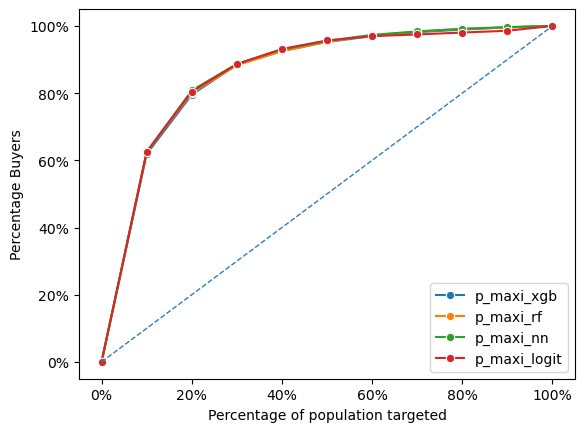

In [113]:
fig = rsm.gains_plot(
    pentathlon_nptb.query('training==0'),
    "buyer","yes",["p_maxi_xgb", "p_maxi_rf", "p_maxi_nn", "p_maxi_logit"], qnt=10
)

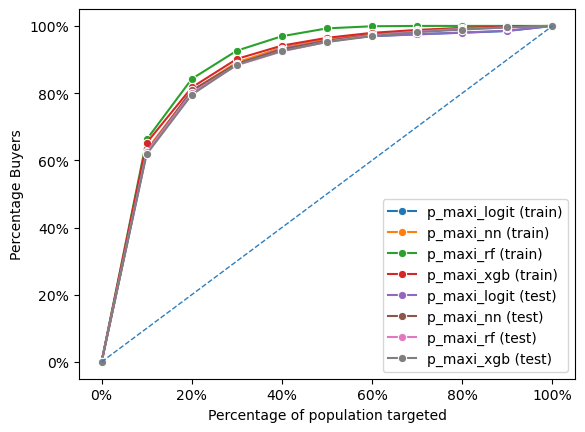

In [114]:
dct = {"train": pentathlon_nptb[pentathlon_nptb.training == 1], "test": pentathlon_nptb[pentathlon_nptb.training == 0]}
fig = rsm.gains_plot(dct, "buyer", "yes", ["p_maxi_logit", "p_maxi_nn", "p_maxi_rf", "p_maxi_xgb"])

In [146]:
# table for improvement in euro and percentage for all models
improvement_all = pd.DataFrame({
    'improvement_logit': improvement_logit['improvement'],
    'percentage_logit': improvement_logit['percentage'],
    'improvement_nn': improvement_nn['improvement'],
    'percentage_nn': improvement_nn['percentage'],
    'improvement_rf': improvement_rf['improvement'],
    'percentage_rf': improvement_rf['percentage'],
    'improvement_xgb': improvement_xgb['improvement'],
    'percentage_xgb': improvement_xgb['percentage']
}, index=['no_message', 'same_message', 'random'])

improvement_all

,improvement_logit,percentage_logit,improvement_nn,percentage_nn,improvement_rf,percentage_rf,improvement_xgb,percentage_xgb
no_message,1.370000e+06,163.720930,1.350000e+06,163.380282,955000.00000,140.899358,1.395000e+06,164.733179
same_message,5.530000e+05,118.638355,5.250000e+05,117.766497,470000.00000,116.666667,5.950000e+05,120.135364
random,7.581844e+05,127.452390,7.212125e+05,126.142371,578179.36186,121.320708,7.910426e+05,128.671794


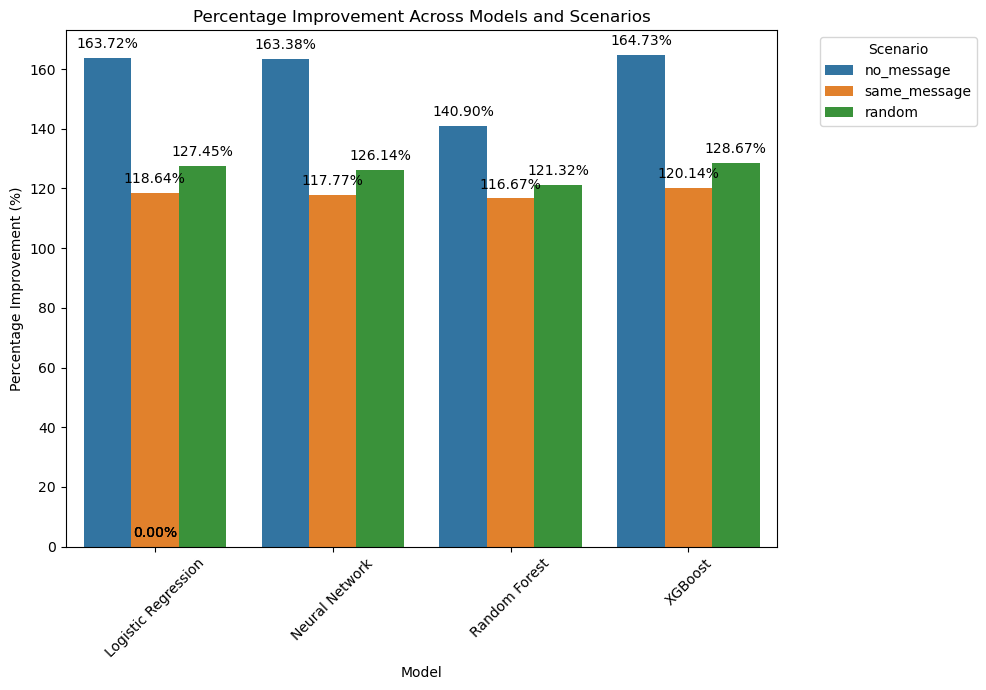

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hard coding the scenario names directly in the melt function might not be directly feasible.
# Instead, let's manually create the scenario column based on the order of rows, assuming the data is structured as seen:
improvement_all['Scenario'] = ['no_message', 'same_message', 'random'] * (len(improvement_all) // 3)

# Preparing the data for plotting
data_plot = pd.melt(improvement_all, id_vars=['Scenario'], value_vars=['percentage_logit', 'percentage_nn', 'percentage_rf', 'percentage_xgb'],
                    var_name='Model', value_name='Percentage Improvement')

# Mapping the model names to more readable format
model_mapping = {
    'percentage_logit': 'Logistic Regression',
    'percentage_nn': 'Neural Network',
    'percentage_rf': 'Random Forest',
    'percentage_xgb': 'XGBoost'
}
data_plot['Model'] = data_plot['Model'].map(model_mapping)

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(data=data_plot, x='Model', y='Percentage Improvement', hue='Scenario')

# Adding titles and labels
plt.title('Percentage Improvement Across Models and Scenarios')
plt.xlabel('Model')
plt.ylabel('Percentage Improvement (%)')
plt.xticks(rotation=45)
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentages on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       size=10, xytext=(0, 10), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# 2.  Comment on the draft for a new e-mail policy proposal. Are there any weaknesses? Can you suggest at least one improvement?

The draft for the new e-mail policy proposed by Anna Quintero incorporates a data-driven approach to optimize the allocation of promotional e-mails across departments, aiming to maximize expected profits by customizing messages to individual customer preferences. This strategy is commendable for its focus on leveraging analytics to enhance customer engagement and profitability. However, there are aspects that could be refined for effectiveness and feasibility.

### Weaknesses in the Draft Policy

1. **Scalability and Complexity**: The policy's requirement for monthly analysis and allocation based on the top two messages per customer introduces significant operational complexity. It assumes a high level of agility in analytics and marketing operations to process, analyze, and implement findings within a very short time frame.

2. **Customer Experience Considerations**: Allocating promotional e-mails based solely on expected profit maximization might overlook the impact on customer experience. Overemphasis on profit could lead to message fatigue, especially if the same departments are repeatedly prioritized, potentially harming long-term customer engagement.

3. **Resource Intensity**: The continuous monthly cycle of analysis and implementation is resource-intensive. It requires sustained analytical effort and potentially diverts resources from other valuable analytics or marketing initiatives.

4. **Lack of Flexibility for Strategic Initiatives**: The proposed process may limit the ability to launch cross-departmental campaigns or strategic initiatives that do not directly align with the short-term profit maximization but are crucial for long-term brand building and customer loyalty.

### Suggested Improvements

1. **Incorporate Customer Satisfaction Metrics**: Alongside expected profit, include customer satisfaction or engagement metrics in the decision-making process. This could involve analyzing open rates, click-through rates, and unsubscribe rates to ensure messages are not only profitable but also welcomed by customers.

2. **Implement A/B Testing for Message Allocation**: To refine the understanding of customer preferences and departmental message effectiveness, implement regular A/B testing within the framework. This could involve testing different messaging strategies for similar customer segments to continuously refine and validate the analytical models.

3. **Dynamic Adjustment Periods**: Instead of a fixed monthly cycle, consider implementing dynamic adjustment periods based on data significance and seasonal variations. During peak shopping seasons, a more frequent analysis might be beneficial, whereas, during slower periods, a longer cycle could suffice.

4. **Strategic Reserve Allocation**: Allow a certain percentage of email capacity to be allocated for strategic initiatives, cross-departmental promotions, or to introduce new product lines. This ensures that not all communications are strictly governed by immediate profit expectations but also by strategic brand considerations.

5. **Transparency and Feedback Loop**: Establish a clear feedback mechanism among departments to discuss the results, share insights, and adjust strategies. This could help address potential concerns about fairness and effectiveness and foster a more collaborative approach to customer engagement.

By addressing these weaknesses and incorporating the suggested improvements, the new e-mail policy can better balance profitability with customer experience, operational feasibility, and strategic flexibility, ultimately leading to more sustainable business growth.

# 3. Generative AI: Describe in detail how your team used Generative AI-tools like ChatGPT to support your work on this case.
Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Make sure to add discussion about your thought process and how you tried to maximize the benefits from using these tools. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Links:
- https://chat.openai.com/share/1178b6d7-1774-4034-96e3-ab07a07f5e49
- https://chat.openai.com/share/e1c00355-f606-41dd-a452-8bc58182b796
- https://chat.openai.com/share/8d3eef1e-849f-48b7-95d3-b9fed5347cbd
- https://chat.openai.com/share/eda37f2d-1d2a-46ff-a8b2-224c78609517
- https://docs.google.com/document/d/1mhatKzWhtZB11yH63LDS0kqoDQQ-b9mycOYcG4XjV5k/edit?usp=sharing

Throughout our comprehensive discussion, we, as a team, strategically utilized ChatGPT to navigate the complexities of machine learning models, focusing on enhancing understanding, troubleshooting, and optimizing model performance. This collaborative effort spanned various aspects, including parameter tuning, model interpretation, and practical application strategies. Here's a detailed reflection on our interaction, highlighting our thought process, successes, challenges, and areas for further discussion.

### Thought Process and Strategy

Our engagement began with a focus on clarifying complex machine learning concepts, particularly around models like XGBoost, Random Forest, and neural networks. Recognizing the importance of foundational understanding, we aimed to demystify the intricacies of these models by dissecting their parameters, operational mechanisms, and impact on predictive performance. This approach was guided by the objective to not only address immediate queries but also to foster a deeper comprehension of the underlying principles governing these models.

To maximize the benefits of ChatGPT, we adopted a methodical inquiry strategy, starting with broad questions before narrowing down to specific details. This incremental learning strategy was instrumental in building a solid understanding, ensuring that each piece of information provided was contextualized within a larger framework of knowledge.

### What Went Well

- **Clarity and Depth of Explanations:** Our interactions were marked by a clear articulation of concepts, providing a detailed exploration of model parameters, their significance, and their practical implications. This facilitated a robust understanding of complex topics.
- **Iterative Learning:** The iterative nature of our queries and the responsive elaboration by ChatGPT proved effective in refining understanding and addressing nuanced aspects of model optimization and interpretation.
- **Practical Application:** We successfully translated theoretical knowledge into practical strategies, particularly in optimizing hyperparameters and troubleshooting model-related issues. This was pivotal in bridging the gap between academic learning and real-world application.

### Areas for Improvement

- **Hands-On Examples:** While theoretical explanations were comprehensive, incorporating more practical examples or code snippets could have further enriched the learning experience, providing a direct application context for the discussed concepts.
- **Advanced Problem-Solving Strategies:** Delving deeper into advanced techniques for model tuning and error diagnosis could enhance the ability to tackle complex data science challenges, broadening the scope of problem-solving strategies.

### Reflections on Support Received

Our collaborative effort with ChatGPT underscored the potential of AI in augmenting the learning and problem-solving process. The support received was instrumental in advancing our understanding of machine learning models, offering both theoretical insights and practical guidance. However, this journey also highlighted the importance of continuous learning, encouraging the pursuit of further knowledge and the exploration of advanced analytical techniques.

### Questions for Further Discussion

- **Balancing Model Complexity:** How can we more effectively balance model complexity with the risk of overfitting, especially in the context of limited data scenarios?
- **Real-World Application:** In what ways can the insights gained from our discussion be applied to real-world business analytics problems, ensuring models are both robust and interpretable?
- **Enhancing AI-Assisted Learning:** How can we further leverage AI tools like ChatGPT to enhance educational outcomes, particularly in the context of data science and business analytics education?
